# **PHASE 3 PROJECT: SYRIATEL CUSTOMER CHURN**

    A project by : Susan Mworia

##**BUSINESS UNDERSTANDING**

SyriaTel Telecommunications Company is dedicated to strengthening customer retention and addressing churn i.e. the rate at which customers cease their business with the company.
By identifying at-risk customers, SyriaTel can take proactive steps to enhance satisfaction, offer personalized incentives, and optimize services.
Anticipating churn will not only help minimize revenue loss but also foster enduring customer loyalty.


##**PROBLEM STATEMENT**

The task is to develop a predictive model that accurately classifies customers likely to discontinue their services with SyriaTel in the near future. This binary classification problem aims to identify customers at risk of churn, based on factors such as usage patterns, demographics, and other relevant data. By doing so, SyriaTel can take timely, targeted actions to retain these customers and mitigate potential revenue loss.


## **OBJECTIVES**
We aim to achieve the following three key objectives:

1.   Identify the causes of customer churn.
2.   Develop and evaluate a predictive model for churn.
3.   Provide actionable recommendations that can be implemented to address the churn issue.






## **DATA UNDERSTANDING**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix


from google.colab import files

In [ ]:
#Load the data and view first 5 rows
df = pd.read_csv('/content/drive/MyDrive/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## **DATA CLEANING**

#### **Duplicates**

In [ ]:
#Check for duplicates
df[df.duplicated()].count()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


#### **Nulls**

In [ ]:
#Check for nulls
df.isna().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


#### **Feature Engineering**

In [29]:
#create new columns: total charges, total minutes, total calls
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']

In [ ]:
#Feature Engineering for a new column Region based on states
#Step 1: find unique columns in state

unique_states = df['state'].unique()
unique_states

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
#Step 2: Visualize churn per state in a map

import plotly.express as px

churn_by_state = df.groupby('state')['churn'].sum().reset_index()

fig = px.choropleth(churn_by_state,
                    locations='state',
                    locationmode="USA-states",
                    hover_name='state',
                    hover_data=['churn'],
                    color='churn',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title='Number of Churns per State')

fig.show()

In [ ]:
#Step 3: Create a dictionary to map each state to regions.
#We will use 4 regions namely:South, Northeast, West, Midwest

state_regions = {
    'KS': 'Midwest', 'OH': 'Midwest', 'NJ': 'Northeast', 'OK': 'South', 'AL': 'South',
    'MA': 'Northeast', 'MO': 'Midwest', 'LA': 'South', 'WV': 'South', 'IN': 'Midwest',
    'RI': 'Northeast', 'IA': 'Midwest', 'MT': 'West', 'NY': 'Northeast', 'ID': 'West',
    'VT': 'Northeast', 'VA': 'South', 'TX': 'South', 'FL': 'South', 'CO': 'West',
    'AZ': 'West', 'SC': 'South', 'NE': 'Midwest', 'WY': 'West', 'HI': 'West',
    'IL': 'Midwest', 'NH': 'Northeast', 'GA': 'South', 'AK': 'West', 'MD': 'South',
    'AR': 'South', 'WI': 'Midwest', 'OR': 'West', 'MI': 'Midwest', 'DE': 'South',
    'UT': 'West', 'CA': 'West', 'MN': 'Midwest', 'SD': 'Midwest', 'NC': 'South',
    'WA': 'West', 'NM': 'West', 'NV': 'West', 'DC': 'South', 'KY': 'South',
    'ME': 'Northeast', 'MS': 'South', 'TN': 'South', 'PA': 'Northeast',
    'CT': 'Northeast', 'ND': 'Midwest'
}

# Step 4: Add a region column to the DataFrame
df['region'] = df['state'].map(state_regions)



In [ ]:
# Create a new DataFrame with 'region' as the first column
new_df = df[['region'] + [col for col in df.columns if col != 'region']]

# Save the new DataFrame to a CSV file
new_df.to_csv('new_file.csv', index=False)

# Display the head of the new CSV file
new_df.head()

# Download the new CSV file
files.download('new_file.csv')
print(df.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'total charges', 'total minutes',
       'total calls', 'region'],
      dtype='object')


This new column Region will further help us understand if the demographic origin of the customer affects churn.

In [ ]:
# Create a new clean DataFrame
clean_df = df[['region', 'account length', 'phone number', 'international plan','voice mail plan', 'customer service calls','total charges', 'total minutes', 'total calls', 'churn']]

# Download the clean DataFrame
clean_df.to_csv('clean_df.csv', index=False)
files.download('clean_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After cleaning, we come up with the dataframe clean_df that we will use going forward

#### **Handling outliers**
Outliers will be addressed by applying a log transformation to the numerical features, specifically account length, total charges, total minutes, and total calls. This transformation will help normalize these features, reducing the impact of extreme values and ensuring a more stable and accurate model.

In [ ]:
# Log Transormation
#First create a copy
clean_df_copy = clean_df.copy()

clean_df_copy['total charges'] = np.log1p(clean_df_copy['total charges'])
clean_df_copy['account length'] = np.log1p(clean_df_copy['account length'])
clean_df_copy['total minutes'] = np.log1p(clean_df_copy['total minutes'])
clean_df_copy['total calls'] = np.log1p(clean_df_copy['total calls'])
clean_df_copy['customer service calls'] = np.log1p(clean_df_copy['customer service calls'])

## **EDA**
We will first check how the independent variables affect CHURN (which is the dependent variable) individually and their significance

### Boxplot for all features

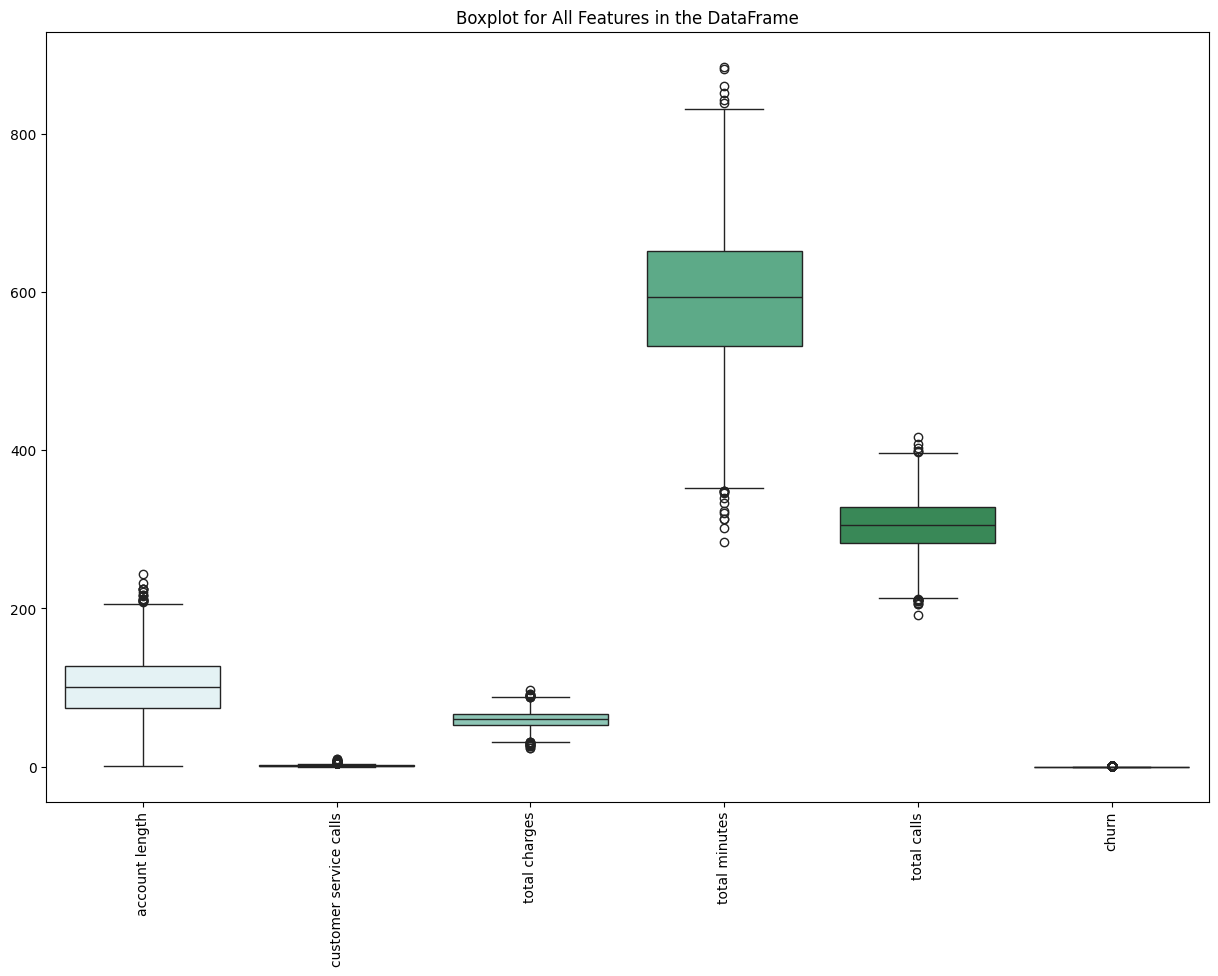

In [ ]:
  #Boxplot for All Features in the DataFrame
  plt.figure(figsize=(15, 10))
  sns.boxplot(data=clean_df, palette="BuGn")

  # Display the plot
  plt.xticks(rotation=90)
  plt.title('Boxplot for All Features in the DataFrame')
  plt.show()

### Churn Per Region

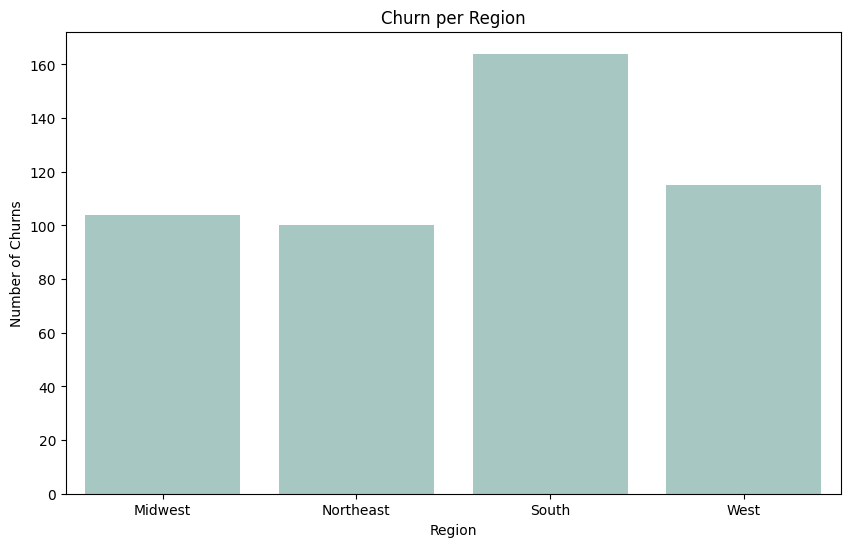

In [ ]:
# Calculate churn per region
churn_by_region = df.groupby('region')['churn'].sum().reset_index()

# Create a bar plot of churn per region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='churn', data=churn_by_region, color='#a2ccc5')
plt.title('Churn per Region')
plt.xlabel('Region')
plt.ylabel('Number of Churns')
plt.show()

### Count plot for feautures


In [ ]:
# First we encode categorical variables i.e. Region, Voice mail plan and International plan
clean_df = pd.get_dummies(clean_df, columns=['region'], drop_first=True)
clean_df['international plan'] = clean_df['international plan'].map({'yes': 1, 'no': 0})
clean_df['voice mail plan'] = clean_df['voice mail plan'].map({'yes': 1, 'no': 0})
clean_df.head()

,account length,phone number,international plan,voice mail plan,customer service calls,total charges,total minutes,total calls,churn,region_Northeast,region_South,region_West
0,128,382-4657,0,1,1,75.56,717.2,303,False,False,False,False
1,107,371-7191,0,1,1,59.24,625.2,332,False,False,False,False
2,137,358-1921,0,0,0,62.29,539.4,333,False,True,False,False
3,84,375-9999,1,0,2,66.80,564.8,255,False,False,False,False
4,75,330-6626,1,0,3,52.09,512.0,359,False,False,True,False


<ipython-input-27-88ead724cc9f>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-27-88ead724cc9f>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-27-88ead724cc9f>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-27-88ead724cc9f>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




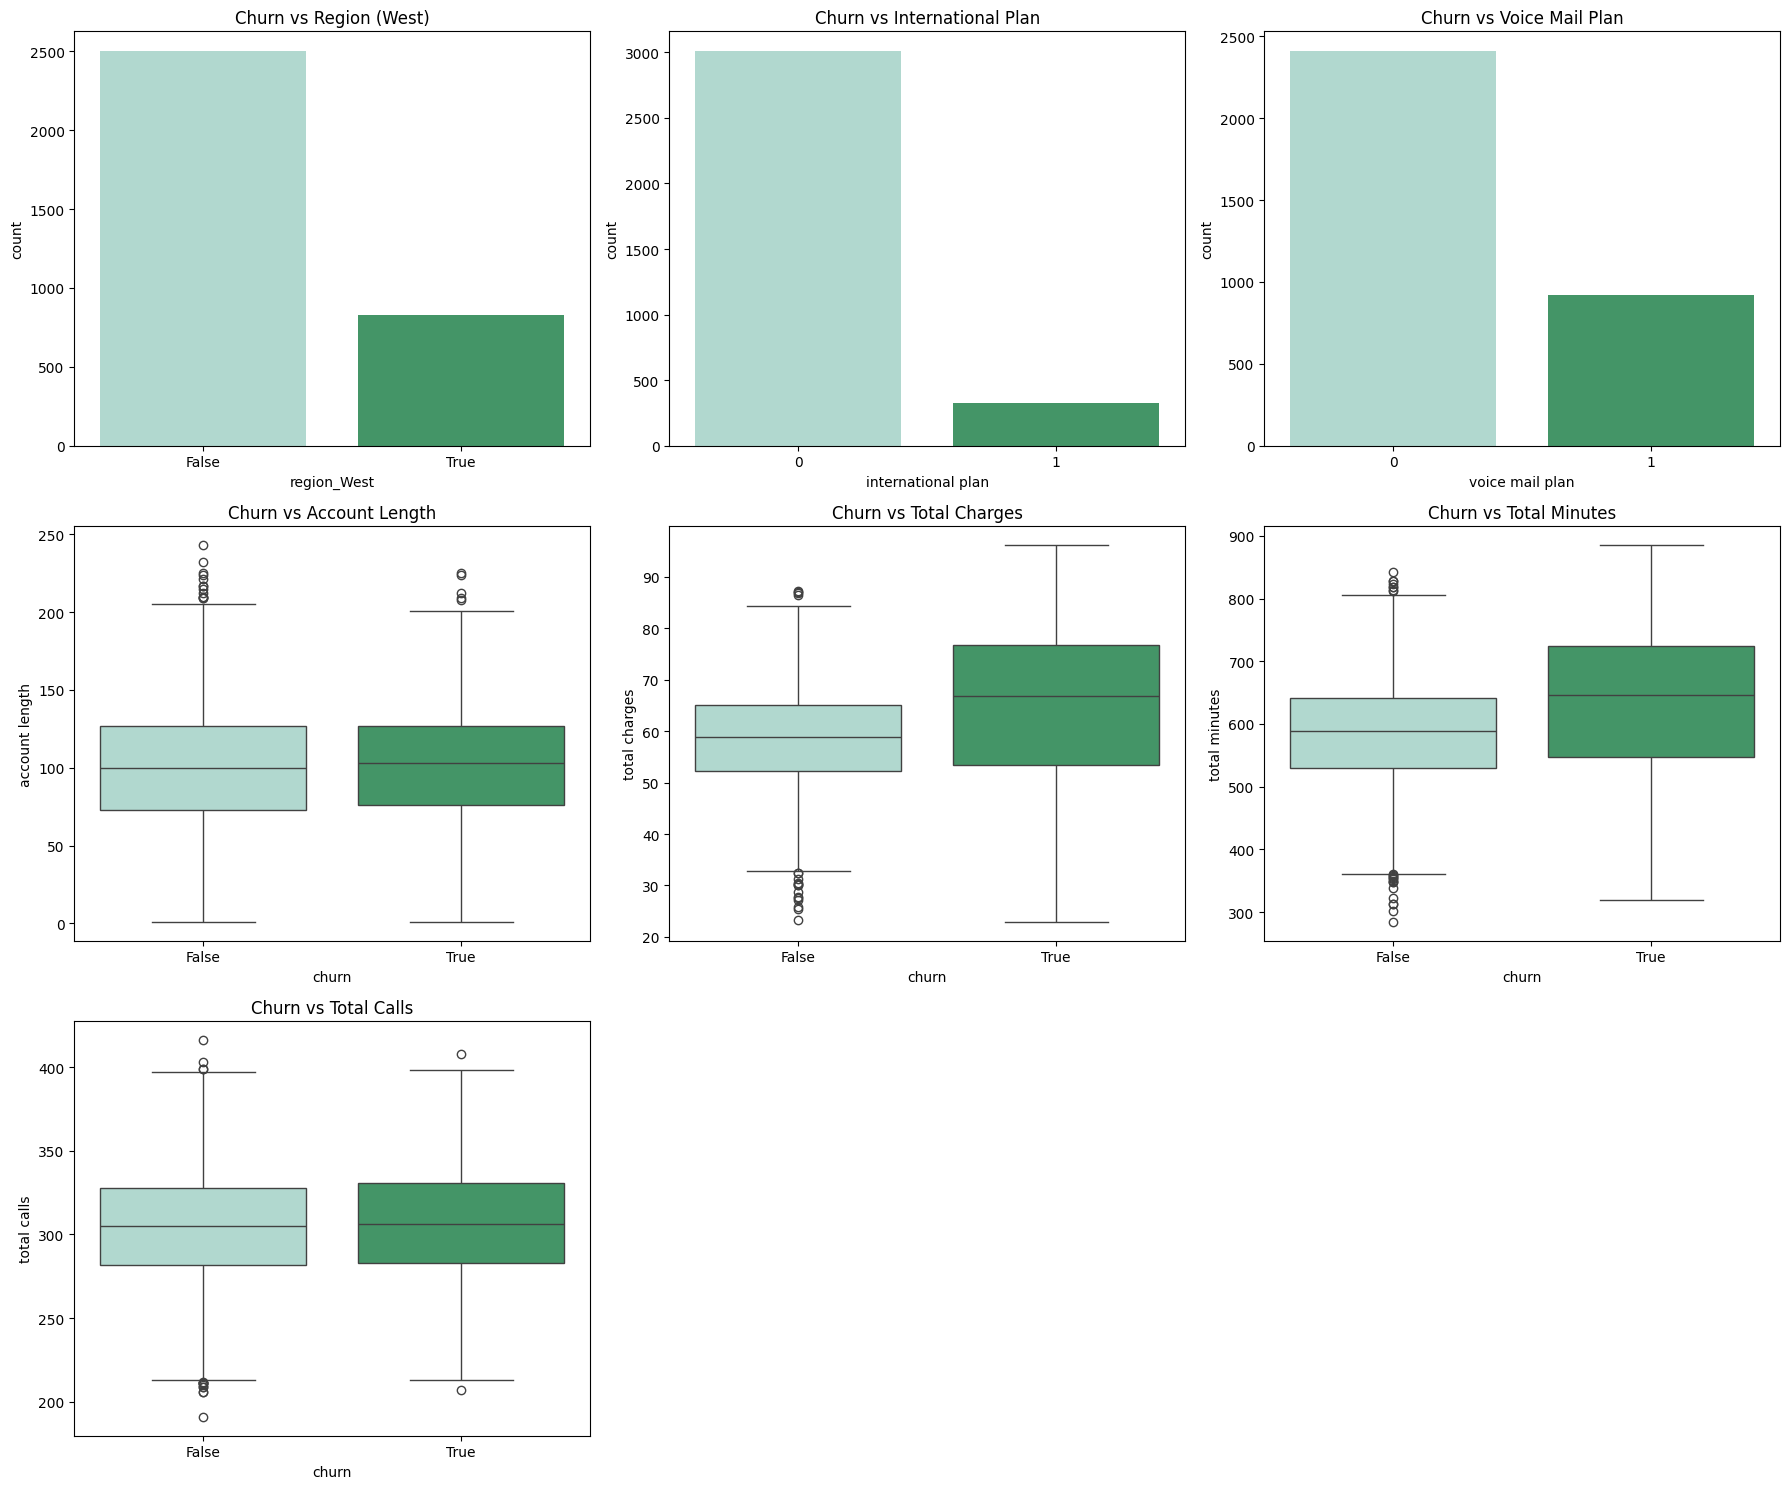

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Plot Region vs Churn (Categorical)
sns.countplot(data=clean_df, x='region_West', hue='region_West', palette='BuGn', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Churn vs Region (West)')

# Plot International Plan vs Churn (Categorical)
sns.countplot(data=clean_df, x='international plan', hue='international plan', palette='BuGn', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Churn vs International Plan')

# Plot Voice Mail Plan vs Churn (Categorical)
sns.countplot(data=clean_df, x='voice mail plan', hue='voice mail plan', palette='BuGn', ax=axes[0, 2], legend=False)
axes[0, 2].set_title('Churn vs Voice Mail Plan')

# Plot Account Length vs Churn (Continuous)
sns.boxplot(data=clean_df, x='churn', y='account length', palette='BuGn', ax=axes[1, 0])
axes[1, 0].set_title('Churn vs Account Length')

# Plot Total Charges vs Churn (Continuous)
sns.boxplot(data=clean_df, x='churn', y='total charges', palette='BuGn', ax=axes[1, 1])
axes[1, 1].set_title('Churn vs Total Charges')

# Plot Total Minutes vs Churn (Continuous)
sns.boxplot(data=clean_df, x='churn', y='total minutes', palette='BuGn', ax=axes[1, 2])
axes[1, 2].set_title('Churn vs Total Minutes')

# Plot Total Calls vs Churn (Continuous)
sns.boxplot(data=clean_df, x='churn', y='total calls', palette='BuGn', ax=axes[2, 0])
axes[2, 0].set_title('Churn vs Total Calls')

# Remove the 8th and 9th empty plots
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjust the layout
plt.tight_layout()
plt.show()


### Check significance of independent variables

In [30]:
from scipy.stats import chi2_contingency

# Chi-square test for Region vs Churn (Example with 'region_West')
region_churn_crosstab = pd.crosstab(clean_df['region_West'], clean_df['churn'])
chi2, p, dof, expected = chi2_contingency(region_churn_crosstab)
print(f"Chi-square test for Region vs Churn: p-value = {p}")

# Chi-square test for International Plan vs Churn
intl_plan_churn_crosstab = pd.crosstab(clean_df['international plan'], clean_df['churn'])
chi2, p, dof, expected = chi2_contingency(intl_plan_churn_crosstab)
print(f"Chi-square test for International Plan vs Churn: p-value = {p}")

# Chi-square test for Voice Mail Plan vs Churn
voice_mail_plan_churn_crosstab = pd.crosstab(clean_df['voice mail plan'], clean_df['churn'])
chi2, p, dof, expected = chi2_contingency(voice_mail_plan_churn_crosstab)
print(f"Chi-square test for Voice Mail Plan vs Churn: p-value = {p}")

Chi-square test for Region vs Churn: p-value = 0.5754462374471592
Chi-square test for International Plan vs Churn: p-value = 2.4931077033159556e-50
Chi-square test for Voice Mail Plan vs Churn: p-value = 5.15063965903898e-09


In [31]:
from scipy.stats import ttest_ind

# Separate the data into churned and non-churned customers
churned = clean_df[clean_df['churn'] == 1]
not_churned = clean_df[clean_df['churn'] == 0]

# Function to perform T-test on a specific feature
def perform_ttest(feature):
    t_stat, p_value = ttest_ind(churned[feature], not_churned[feature])
    print(f"T-test for {feature} vs Churn: p-value = {p_value}")

# Perform T-test for Account Length
perform_ttest('account length')

# Perform T-test for Total Charges
perform_ttest('total charges')

# Perform T-test for Total Minutes
perform_ttest('total minutes')

# Perform T-test for Total Calls
perform_ttest('total calls')

T-test for account length vs Churn: p-value = 0.3397600070563822
T-test for total charges vs Churn: p-value = 8.219994380634752e-42
T-test for total minutes vs Churn: p-value = 5.374749329393565e-31
T-test for total calls vs Churn: p-value = 0.3616168365179637


Based on the T-test for numerical data and the Chi-square test for categorical data, we conclude that the features most influencing churn are the International Plan, Voice Mail Plan, Total Minutes, and Total Charges.

In [32]:
#We will also check how account length affects churn

X = clean_df['account length']
y = clean_df['churn']

X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9116
Date:                Fri, 07 Mar 2025   Prob (F-statistic):              0.340
Time:                        20:29:34   Log-Likelihood:                -1248.9
No. Observations:                3333   AIC:                             2502.
Df Residuals:                    3331   BIC:                             2514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1301      0.017      7.

The R-squared value indicates that account length, or the duration of a customer's subscription, has no significant impact on churn.

### Multicollinearity between independent features

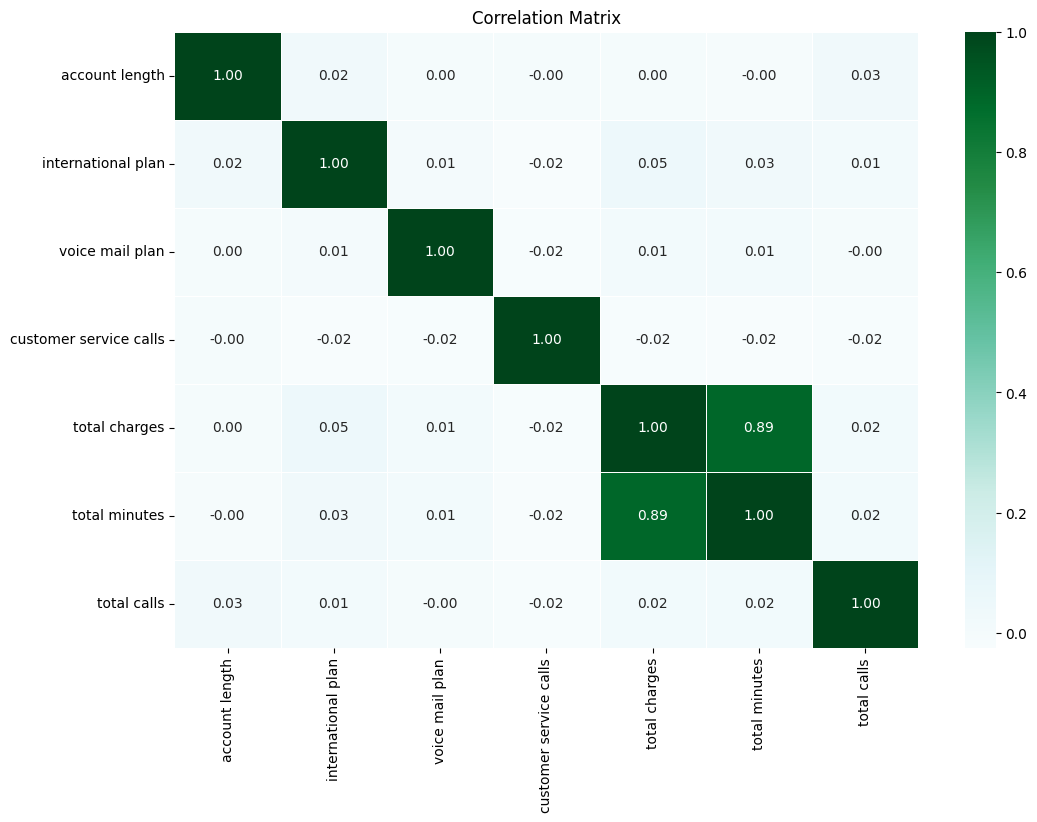

In [33]:
#Check for multicollinearity between independent features

# Select only numeric columns for correlation matrix
numeric_df = clean_df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We observe a very high collinearity between total charges and total minutes, which is expected, as increased talk time typically results in higher charges.
To reduce noise in the model, we will need to choose one of the two features.

## **PREPROCESSING**

### Encoding

In [34]:
# check on characteristics of data
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   phone number            3333 non-null   object 
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   customer service calls  3333 non-null   int64  
 5   total charges           3333 non-null   float64
 6   total minutes           3333 non-null   float64
 7   total calls             3333 non-null   int64  
 8   churn                   3333 non-null   bool   
 9   region_Northeast        3333 non-null   bool   
 10  region_South            3333 non-null   bool   
 11  region_West             3333 non-null   bool   
dtypes: bool(4), float64(2), int64(5), object(1)
memory usage: 221.5+ KB


In [35]:
# Convert both international plan and voice mail plan to Boolean (0/1 or False/True)
clean_df['international plan'] = clean_df['international plan'].astype(bool)
clean_df['voice mail plan'] = clean_df['voice mail plan'].astype(bool)

In [36]:
#Create categories for customer service calls based on the number of calls

bins = [0, 3, 6, 9, 10]  # Define the bins: [0, 3), [3, 6), [6, 9), [9, 10]
labels = ['Low', 'Medium', 'High', 'Very High']  # Define the category labels

# Create the categories using pd.cut
clean_df['customer service calls category'] = pd.cut(clean_df['customer service calls'], bins=bins, labels=labels, right=False)

# Convert the categorical values to numerical codes (1, 2, 3, 4)
clean_df['customer service calls category'] = clean_df['customer service calls category'].cat.codes + 1


### Scaling

In [37]:
#numerical features to scale
numeric_features = ['total charges', 'total minutes', 'total calls']

scaler = StandardScaler()
clean_df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [ ]:
clean_df.head(7)

,account length,phone number,international plan,voice mail plan,customer service calls,total charges,total minutes,total calls,churn,region_Northeast,region_South,region_West,customer service calls category
0,128,382-4657,False,True,1,1.534209,1.393531,-0.062048,False,False,False,False,1
1,107,371-7191,False,True,1,-0.019975,0.370635,0.779923,False,False,False,False,1
2,137,358-1921,False,False,0,0.270482,-0.583326,0.808957,False,True,False,False,1
3,84,375-9999,True,False,2,0.699978,-0.300918,-1.455655,False,False,False,False,1
4,75,330-6626,True,False,3,-0.700883,-0.887971,1.563827,False,False,True,False,2
5,118,391-8027,True,False,0,0.777116,0.693070,0.518622,False,False,True,False,1
6,121,355-9993,False,True,3,1.796097,2.167374,0.460555,False,True,False,False,2


In [41]:
#Drop columns that will not be needed in modeling
encoded_df = clean_df.copy()
encoded_df.drop(['phone number', 'account length'], axis=1, inplace=True)



We will drop the phone number feature as it has no impact on churn, and account length, as its significance is very low.

In [42]:
encoded_df.head()

,international plan,voice mail plan,customer service calls,total charges,total minutes,total calls,churn,region_Northeast,region_South,region_West,customer service calls category
0,False,True,1,1.534209,1.393531,-0.062048,False,False,False,False,1
1,False,True,1,-0.019975,0.370635,0.779923,False,False,False,False,1
2,False,False,0,0.270482,-0.583326,0.808957,False,True,False,False,1
3,True,False,2,0.699978,-0.300918,-1.455655,False,False,False,False,1
4,True,False,3,-0.700883,-0.887971,1.563827,False,False,True,False,2


In [43]:
encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   international plan               3333 non-null   bool   
 1   voice mail plan                  3333 non-null   bool   
 2   customer service calls           3333 non-null   int64  
 3   total charges                    3333 non-null   float64
 4   total minutes                    3333 non-null   float64
 5   total calls                      3333 non-null   float64
 6   churn                            3333 non-null   bool   
 7   region_Northeast                 3333 non-null   bool   
 8   region_South                     3333 non-null   bool   
 9   region_West                      3333 non-null   bool   
 10  customer service calls category  3333 non-null   int8   
dtypes: bool(6), float64(3), int64(1), int8(1)
memory usage: 127.1 KB


## **MODELING**

### Classification Models

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = encoded_df[['international plan', 'voice mail plan','total charges', 'total calls', 'region_Northeast',
        'region_South', 'region_West', 'customer service calls category']]

y = encoded_df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Results:
Accuracy: 0.8575712143928036
Recall: 0.16831683168316833
Precision: 0.6071428571428571
F1 Score: 0.26356589147286824


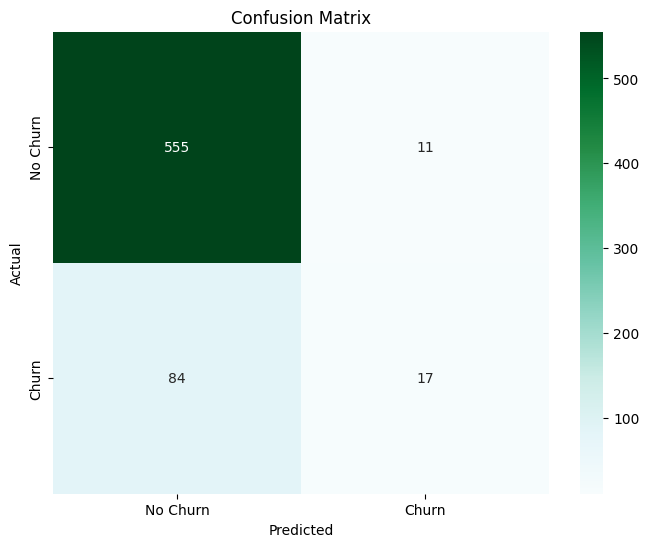

In [45]:
#Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=200)

#Fit the model on the training data
logreg_model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = logreg_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Print the results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

#Plot the confusion matrix into a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression Model performs poorly with a low recall rate of 16%

#### **Random Forest**

Random Forest Results:
Accuracy: 0.9070464767616192
Recall: 0.6039603960396039
Precision: 0.7349397590361446
F1 Score: 0.6630434782608695


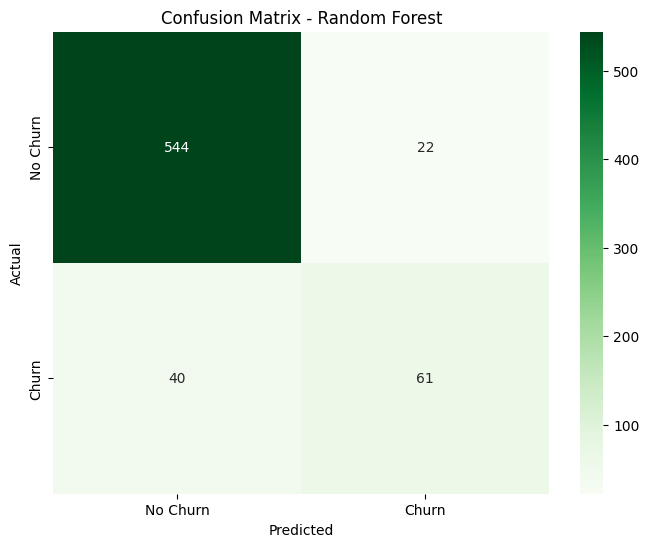

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, )

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Random Forest Results:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix into a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Random Forest Models performs better with improved recall, precision and accuracy

#### **Decision Tree**

Decision Tree Results:
Accuracy: 0.881559220389805
Recall: 0.7128712871287128
Precision: 0.5901639344262295
F1 Score: 0.6457399103139013


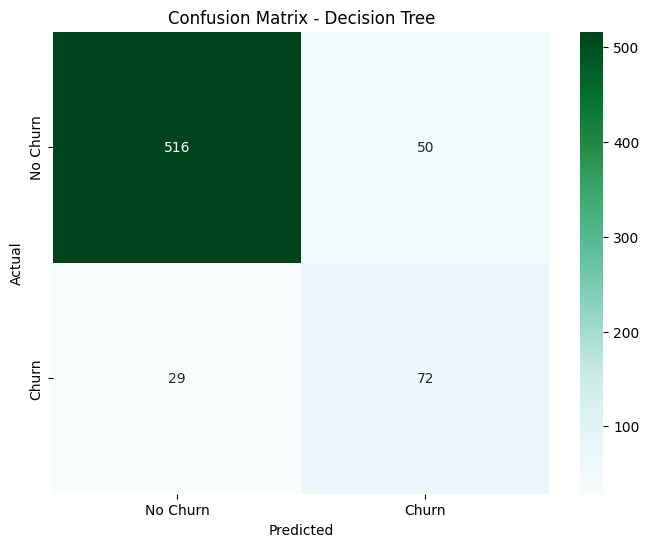

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix into a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


#### **K-Nearest Neighbors (KNN)**

K-Nearest Neighbors Results:
Accuracy: 0.896551724137931
Recall: 0.5346534653465347
Precision: 0.7105263157894737
F1 Score: 0.6101694915254238


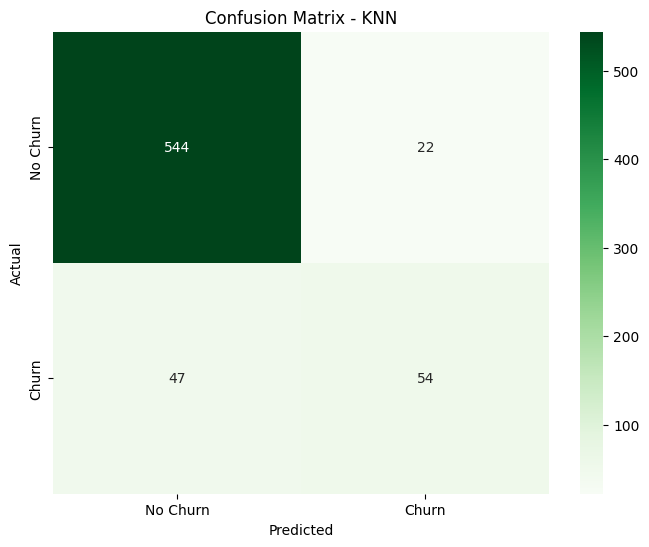

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("K-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix into a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


KNN is not one of the best models with a low recall

#### **Naive Bayes**

Naive Bayes Results:
Accuracy: 0.841079460269865
Recall: 0.3465346534653465
Precision: 0.4666666666666667
F1 Score: 0.3977272727272727


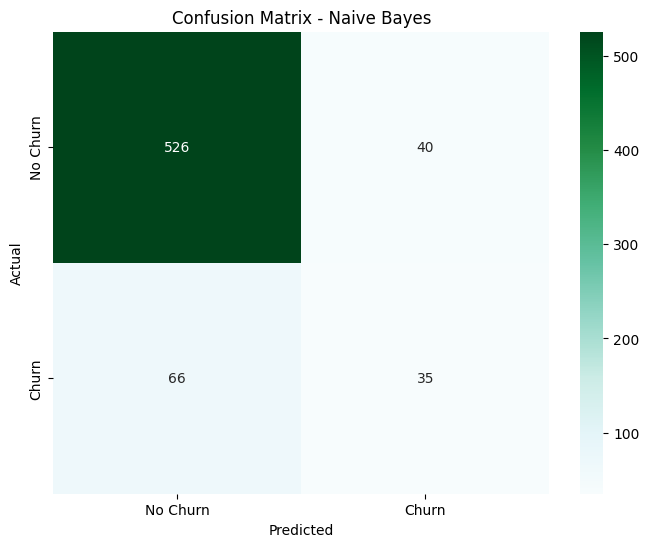

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix into a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


Naive Bayes performs poorly in recall, precision and F1 score

#### **SMOTE**

We will apply SMOTE (Synthetic Minority Over-sampling Technique) to address the class imbalance between churn and non-churn, whereby the non-churn class has significantly more samples than the churn class. SMOTE oversamples the minority class in the training data by generating synthetic samples, helping to balance the distribution and improve model performance.

In [ ]:

from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE object
smote = SMOTE(random_state=42)

# Fit and resample the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution before SMOTE: Counter({False: 2284, True: 382})
Class distribution after SMOTE: Counter({False: 2284, True: 2284})


##### **SMOTE on Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Random Forest Results after SMOTE:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Random Forest Results after SMOTE:
Accuracy: 0.8725637181409296
Recall: 0.7425742574257426
Precision: 0.5597014925373134
F1 Score: 0.6382978723404256


With SMOTE on Random Forest, the recall improves but there is a huge compromise on precision.
This model will be suitable if the business's main focus is catching most churns

##### **SMOTE on XGBOOST**

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model on training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Print the results
print("XGBoost Results after SMOTE:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


XGBoost Results after SMOTE:
Accuracy: 0.8725637181409296
Recall: 0.7722772277227723
Precision: 0.5571428571428572
F1 Score: 0.6473029045643154


With SMOTE on XGBoost, the recall improves but there is a huge compromise on precision.
This model will be suitable if the business's main focus is catching most churns

#### **Hyperparameter Tuning**
Hyperparameter tuning is the process of adjusting the hyperparameters of a model to improve its performance. Hyperparameters are the configurations or settings that are defined before training the model and they directly influence the training process or the model’s structure. Tuning these hyperparameters helps optimize the model's ability to make predictions, avoid overfitting, and achieve better generalization.

In this case, we'll focus on tuning the hyperparameters for Random Forest and XGBoost models.

##### **Hyperparameter Tuning on Random Forest**

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tuned Random Forest - Accuracy: 0.9220389805097451
Tuned Random Forest - Recall: 0.5247524752475248
Tuned Random Forest - Precision: 0.9298245614035088
Tuned Random Forest - F1-score: 0.6708860759493671

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.99      0.96       566
        True       0.93      0.52      0.67       101

    accuracy                           0.92       667
   macro avg       0.93      0.76      0.81       667
weighted avg       0.92      0.92      0.91       667



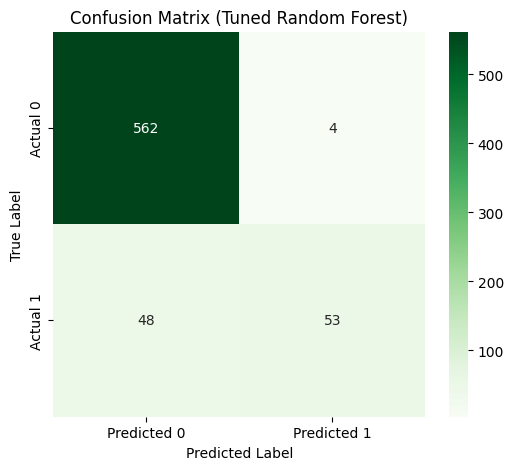

In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the training data
rf_grid.fit(X_train, y_train)

# Get the best estimator from the search
rf_model_tuned = rf_grid.best_estimator_

# Make predictions using the tuned model
y_pred = rf_model_tuned.predict(X_test)

# Evaluate the tuned model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Tuned Random Forest - Accuracy: {rf_accuracy}")
print(f"Tuned Random Forest - Recall: {rf_recall}")
print(f"Tuned Random Forest - Precision: {rf_precision}")
print(f"Tuned Random Forest - F1-score: {rf_f1}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for the tuned model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##### **Hyperparameter Tuning on XGBoost**

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Tuned XGBoost - Accuracy: 0.9295352323838081
Tuned XGBoost - Recall: 0.5544554455445545
Tuned XGBoost - Precision: 0.9655172413793104
Tuned XGBoost - F1-score: 0.7044025157232704

Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       566
        True       0.97      0.55      0.70       101

    accuracy                           0.93       667
   macro avg       0.95      0.78      0.83       667
weighted avg       0.93      0.93      0.92       667



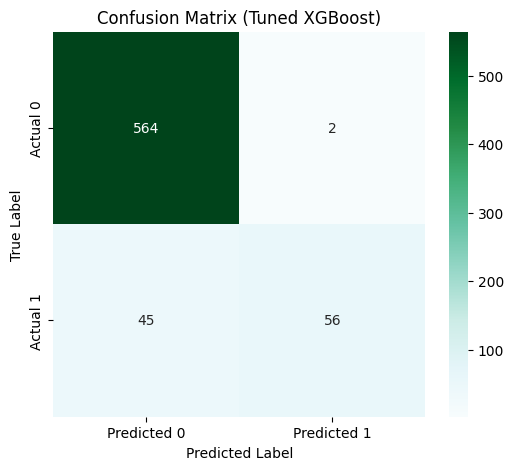

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 6, 10],  # Depth of each tree
    'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinking
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2],  # Regularization term to avoid overfitting
    'min_child_weight': [1, 5, 10]  # Minimum sum of instance weight for a child node
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Initialize GridSearchCV for XGBoost
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the training data
xgb_grid.fit(X_train, y_train)

# Get the best estimator from the search
xgb_model_tuned = xgb_grid.best_estimator_

# Make predictions using the tuned model
y_pred = xgb_model_tuned.predict(X_test)

# Evaluate the tuned model
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Tuned XGBoost - Accuracy: {xgb_accuracy}")
print(f"Tuned XGBoost - Recall: {xgb_recall}")
print(f"Tuned XGBoost - Precision: {xgb_precision}")
print(f"Tuned XGBoost - F1-score: {xgb_f1}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for the tuned model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuGn",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (Tuned XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### **Ensemble Model**
An Ensemble Model is a machine learning technique that combines multiple models to create a more accurate and reliable model. By using several models together, it reduces errors and improves performance compared to using just one model.
Below wecreate an Ensemble Model using a VotingClassifier that combines predictions from multiple models (Random Forest, XGBoost, and Logistic Regression). It uses soft voting, where the models predict probabilities, and the final prediction is based on the average probability of each class across all models.


Shape of encoded X: (3333, 8)
Ensemble Model - Accuracy: 0.9145427286356822
Ensemble Model - Recall: 0.5544554455445545
Ensemble Model - Precision: 0.8235294117647058
Ensemble Model - F1-score: 0.6627218934911243

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       566
        True       0.82      0.55      0.66       101

    accuracy                           0.91       667
   macro avg       0.87      0.77      0.81       667
weighted avg       0.91      0.91      0.91       667



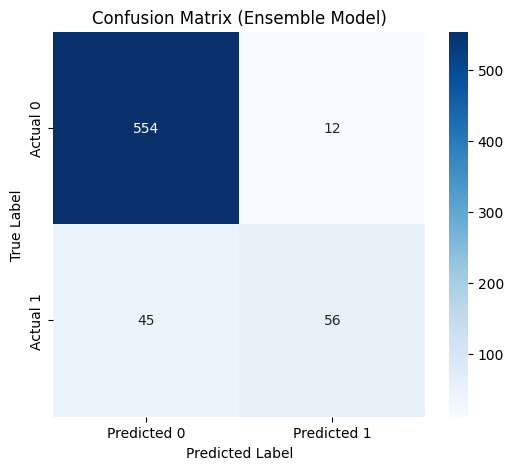

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # Ensure that categorical variables are encoded

# Check the new shape of X_encoded
print("Shape of encoded X:", X_encoded.shape)  # Ensure the encoded shape is correct

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Create an ensemble model using VotingClassifier (soft voting for probabilities)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lr', lr_model)
], voting='soft')  # 'soft' voting uses predicted probabilities for better performance

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Ensemble Model - Accuracy: {accuracy}")
print(f"Ensemble Model - Recall: {recall}")
print(f"Ensemble Model - Precision: {precision}")
print(f"Ensemble Model - F1-score: {f1}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for the ensemble model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (Ensemble Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Feature Importance

<ipython-input-42-a36e73922e3c>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




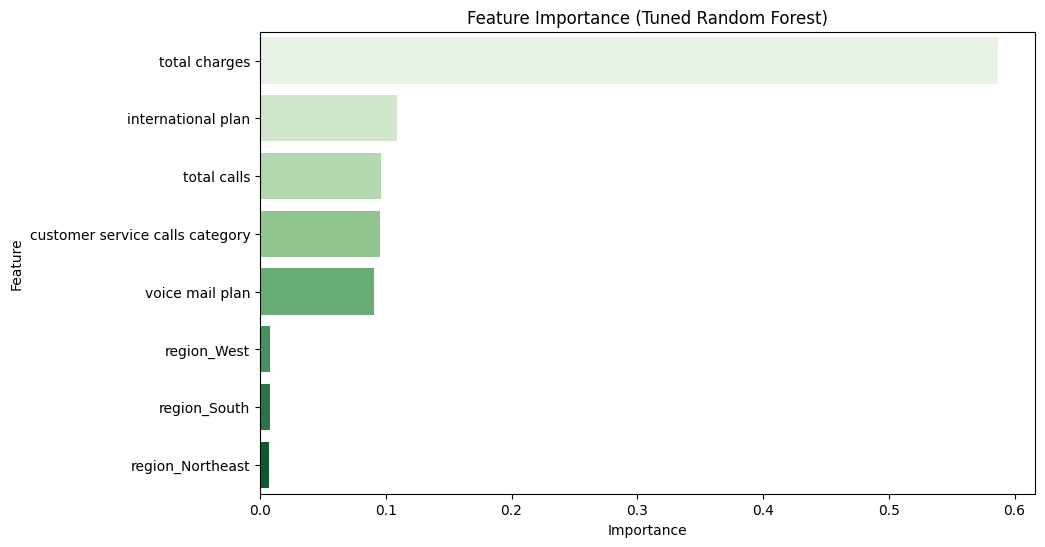

In [ ]:
# Feature Importance
feature_importances = rf_model_tuned.feature_importances_

# Create a DataFrame for visualization
import pandas as pd

feature_names = X_train.columns  # assuming X_train is a DataFrame with column names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', palette="Greens",  data=importance_df)
plt.title("Feature Importance (Tuned Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## **MODEL EVALUATION**

#### AUC for Tuned Random Forest


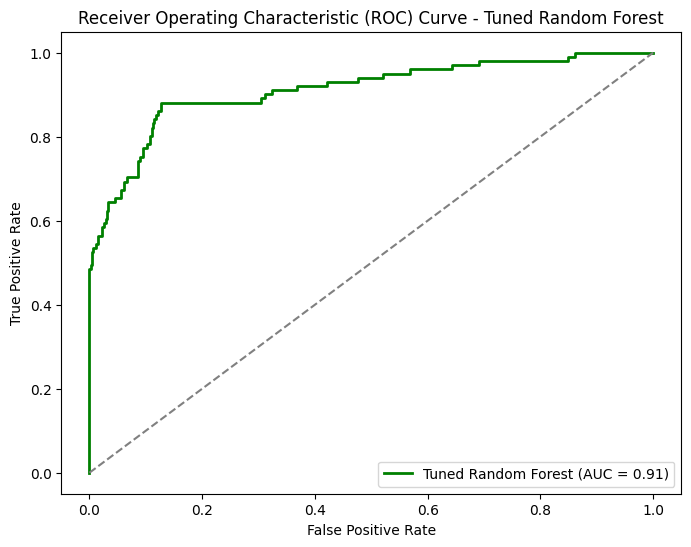

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (class 1)
y_prob_rf = rf_model_tuned.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Compute AUC (Area Under the Curve)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Tuned Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Random Forest')
plt.legend(loc="lower right")
plt.show()


#### AUC for Tuned XGBoost

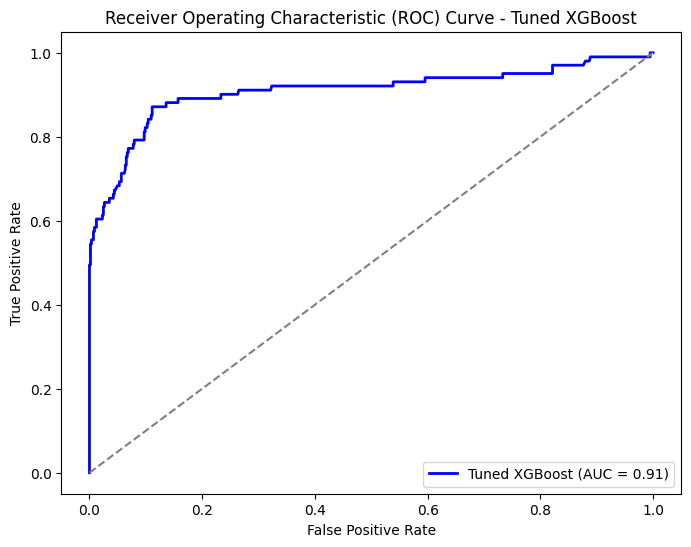

In [53]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (class 1)
y_prob_xgb = xgb_model_tuned.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Compute ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

# Compute AUC (Area Under the Curve)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'Tuned XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned XGBoost')
plt.legend(loc="lower right")
plt.show()


We will use 4 features to evaluate the different models: Accuracy, Recall, Precision, and F1 Score.
The models demonstrated mixed results, so selecting the best model to solve the problem for Syriatel depends heavily on the business priorities:

1.   If the priority is catching every potential churner:Prioritize models with a high recall rate, i.e., models that are good at identifying most churners. The following models perform well in this area:
     *   Decision Tree with a Recall of 71%
     *   Random Forest after SMOTE with a Recall of 74%
     *   XGBoost after SMOTE with a Recall of 77%

2.   If the cost of false positives is too high (e.g., limited budget, meaning avoiding unnecessary offers to non-churners):Prioritize precision, which means that from all churn predictions, most are correct. The models with the best precision are:
     *   Tuned Random Forest with a Precision of 93%
     *   Tuned XGBoost with a Precision of 97%

3.   If you want to strike a balance between precision and recall:Choose models with the best F1 Score, which considers both precision and recall. The models with the highest F1 Scores are:
     *  Tuned Random Forest with an F1 Score of 67%
     *  Tuned XGBoost with an F1 Score of 70%

4.   Tuned Random Forest and XGBoost have highest AUC at 0.91


## **CONCLUSIONS & RECOMMENDATIONS**

From the analysis we conclude below are the **Main contributors to churn:**
1.   Total charges
2.   Voice mail plan
3.   Customer service calls
4.   International plan
---
**RECOMMENDATIONS**
1.   Improve Customer Retention Programs: Focus on high-risk customers identified by the models. Offer targeted promotions, loyalty programs, and personalized offers to keep them engaged.
2.   Proactive Customer Support: Provide dedicated support for customers identified as 'at-risk' (e.g., those with a high number of customer service calls). Introduce early intervention strategies when customers show signs of dissatisfaction.
3.   Product Improvement: Customers with specific service plans (e.g., international plan, voicemail plan) are more likely to churn. Evaluate the possibility of introducing new features or bundling options to retain these customers.
4.   Optimize Pricing Models: Offer flexible pricing models or discounts for long-term customers or those with high usage (e.g., total minutes or charges).
---
**Key Analysis Challenges**
1.   Imbalanced Dataset:There was a significant data imbalance between churn and non-churn customers. Churn accounted for 14%, while non-churn made up 86%.
2.   Precision-Recall Tradeoff:
---
**Next Steps**
1.   Model Deployment
2.   Customer Segmentation:
3.   Monitor and Adjust:Monitor churn rates regularly and update models













